In [204]:
import os
import requests
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

<div align="center">
    <img src="https://static2.deeperblue.com/wp-content/uploads/2023/04/Crab-AdobeStock_578423878-1068x712.jpeg?width=2300" alt="Crab" width="65%">
</div>

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">

# Derick Carlson Final Project
## 6/28/2023

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">


* Data Choice
* Data Prep
* Data Details
* Exploratory Data Analysis
* Addtional Data Analysis
* Model of Crab Size Over Time
</div>

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Data Choice
* Source: Kaggle
* Description: Crab age, sex, and size measurements
* Why: Upon inspection, the Dataset appeared clean, large, and had interesting dimensions to explore without being overwhelming.

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Data Prep
* Download and Retrieval
* Remove "0"s and na
* New Calculated Variables

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Download and Retrieval

In [130]:
# URL of file
url = "https://www.kaggle.com/datasets/shalfey/extended-crab-age-prediction/download?datasetVersionNumber=1"

In [131]:
# File path to save the downloaded file
file_path = "Crabs.csv"

In [132]:
def download_file(url, file_path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print("File downloaded successfully.")
    else:
        print("Failed to download file.")

In [133]:
def check_and_download_file(url, file_path):
    if not os.path.isfile(file_path):
        download_file(url, file_path)
    else:
        print("File already exists.")

In [134]:
# Check if the file exists and download it if necessary
check_and_download_file(url, file_path)

File already exists.


In [135]:
df = pd.read_csv(file_path)

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Remove "0"s and na

In [136]:
df.replace(0, float('nan'), inplace=True)
df.dropna(inplace=True)

In [137]:
# Get the count of NA values in each column
na_counts = df.isna().sum()
null_counts = df.isnull().sum()
print("NA counts:")
print(na_counts)
print("Null counts:")
print(null_counts)

NA counts:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64
Null counts:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## New Calculated Variable
Because many of the variables will be colinear, I want to produce two calculated variables called Volume and Density

In [138]:
# Volume
df['Volume'] = np.pi * (df['Diameter'] / 2)**2 * df['Height']

In [139]:
 # Density
df['Density'] = df['Weight'] / df['Volume']

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Data Details
* Rows and Column Counts
* Info
* Top Rows Sample

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Rows and Column Counts

In [140]:
print(df.shape)

(199852, 12)


<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Info

In [141]:
# info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199852 entries, 1 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              199852 non-null  float64
 1   Sex             199852 non-null  object 
 2   Length          199852 non-null  float64
 3   Diameter        199852 non-null  float64
 4   Height          199852 non-null  float64
 5   Weight          199852 non-null  float64
 6   Shucked Weight  199852 non-null  float64
 7   Viscera Weight  199852 non-null  float64
 8   Shell Weight    199852 non-null  float64
 9   Age             199852 non-null  float64
 10  Volume          199852 non-null  float64
 11  Density         199852 non-null  float64
dtypes: float64(11), object(1)
memory usage: 19.8+ MB
None


<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Top Rows Sample

In [142]:
df.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
1  1.0   I  1.2375    1.0000  0.3750  21.885814        7.654365   
2  2.0   F  1.4500    1.1625  0.4125  28.250277       11.127179   
3  3.0   I  1.3500    1.0250  0.3750  21.588144        9.738053   
4  4.0   I  1.1375    0.8750  0.2875  14.968536        5.953395   
5  5.0   F  1.4875    1.1875  0.4000  28.335325       12.048538   

   Viscera Weight  Shell Weight   Age    Volume    Density  
1        3.798833      7.654365  19.0  0.294524  74.309024  
2        7.016501      7.257472  11.0  0.437824  64.524248  
3        4.110678      6.378637   9.0  0.309435  69.766419  
4        2.962523      3.713785   8.0  0.172880  86.583570  
5        7.668540      8.504850  10.0  0.443014  63.960388

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Exploratory Data Analysis
* Descriptive Statistics
* Outliers
* Differences in Categoric Variables
* Correlation Matrix in Measurements

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Descriptive Statistics

In [143]:
# Descriptive statistics
print(df.describe())

                  id         Length       Diameter         Height  \
count  199852.000000  199852.000000  199852.000000  199852.000000   
mean    99996.314633       1.313000       1.020788       0.346273   
std     57734.152658       0.289181       0.238135       0.090756   
min         1.000000       0.187500       0.112500       0.012500   
25%     49996.750000       1.150000       0.875000       0.287500   
50%     99999.500000       1.375000       1.075000       0.362500   
75%    149994.250000       1.525000       1.200000       0.412500   
max    199999.000000       7.583491       2.250000       2.825000   

              Weight  Shucked Weight  Viscera Weight   Shell Weight  \
count  199852.000000   199852.000000   199852.000000  199852.000000   
mean       23.138912        9.996106        4.996516       6.638642   
std        12.589390        5.600855        2.783996       3.554264   
min         0.028349        0.014175        0.014175       0.042524   
25%        13.168343   

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Outliers

In [144]:
threshold = 3

z_score = (df['Density'] - df['Density'].mean()) / df['Density'].std()
outliers = df[abs(z_scores) > threshold]
df = df.drop(outliers.index)
df = df.reset_index(drop=True)


<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Categoric Variables
* Sex: M/F
* Age is both numeric and categoric.

In [145]:
# setup
variables = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Volume', 'Density']
ages = np.sort(df['Age'].unique())

grouped = df.groupby(['Sex', 'Age'])


In [146]:
for age in ages:
    print(f"\nAge: {age}")
    print("-------------------------")
    group = df[df['Age'] == age]
    for var in variables:
        group1 = group[group['Sex'] == 'M'][var]
        group2 = group[group['Sex'] == 'F'][var]
        # Check if there are sufficient data points in each group
        if len(group1) < 2 or len(group2) < 2:
            print(f"For Age={age}, Variable={var}: Insufficient data")
            continue
        t_statistic, p_value = stats.ttest_ind(group1, group2)
        print(f"Age={age}, Variable={var}: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
        if p_value < 0.05:
            print("Reject null")



Age: 1.0
-------------------------
For Age=1.0, Variable=Length: Insufficient data
For Age=1.0, Variable=Diameter: Insufficient data
For Age=1.0, Variable=Height: Insufficient data
For Age=1.0, Variable=Weight: Insufficient data
For Age=1.0, Variable=Shucked Weight: Insufficient data
For Age=1.0, Variable=Viscera Weight: Insufficient data
For Age=1.0, Variable=Shell Weight: Insufficient data
For Age=1.0, Variable=Volume: Insufficient data
For Age=1.0, Variable=Density: Insufficient data

Age: 2.0
-------------------------
For Age=2.0, Variable=Length: Insufficient data
For Age=2.0, Variable=Diameter: Insufficient data
For Age=2.0, Variable=Height: Insufficient data
For Age=2.0, Variable=Weight: Insufficient data
For Age=2.0, Variable=Shucked Weight: Insufficient data
For Age=2.0, Variable=Viscera Weight: Insufficient data
For Age=2.0, Variable=Shell Weight: Insufficient data
For Age=2.0, Variable=Volume: Insufficient data
For Age=2.0, Variable=Density: Insufficient data

Age: 3.0
----

Age=14.0, Variable=Diameter: t-statistic=-3.379, p-value=0.001
Reject null
Age=14.0, Variable=Height: t-statistic=-3.243, p-value=0.001
Reject null
Age=14.0, Variable=Weight: t-statistic=-2.913, p-value=0.004
Reject null
Age=14.0, Variable=Shucked Weight: t-statistic=-1.508, p-value=0.132
Age=14.0, Variable=Viscera Weight: t-statistic=-4.498, p-value=0.000
Reject null
Age=14.0, Variable=Shell Weight: t-statistic=-3.345, p-value=0.001
Reject null
Age=14.0, Variable=Volume: t-statistic=-3.674, p-value=0.000
Reject null
Age=14.0, Variable=Density: t-statistic=2.355, p-value=0.019
Reject null

Age: 15.0
-------------------------
Age=15.0, Variable=Length: t-statistic=0.779, p-value=0.436
Age=15.0, Variable=Diameter: t-statistic=1.064, p-value=0.288
Age=15.0, Variable=Height: t-statistic=0.800, p-value=0.423
Age=15.0, Variable=Weight: t-statistic=1.493, p-value=0.136
Age=15.0, Variable=Shucked Weight: t-statistic=1.995, p-value=0.046
Reject null
Age=15.0, Variable=Viscera Weight: t-statisti

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
### Notes on t tests
* It appears that crabs aged 5-11 have sigificant size differences between sexes.  
* There appears to be no difference past 20 years old.
* When they are first hatched *and* when they get older, the diffrence becomes scientifically insignificant.

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Correlation Matrix in Measurements

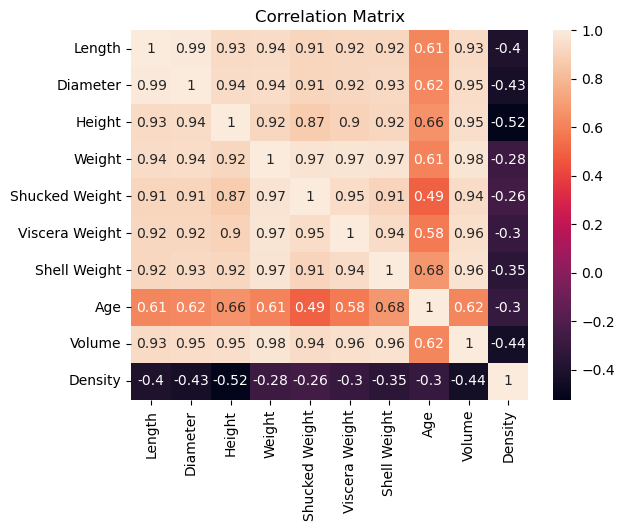

In [147]:
df_1 = df.drop('id', axis=1)
correlation_matrix = df_1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Additional Data Analysis
* Normalized Sample Across Ages
* Split into Age Buckets Discovered in EDA
* Review Sample
* Test Male Female Significance in Each Age Group
* Pairplot Exploration by Age Bucket

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Normalized Sample Across Ages

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
### Sampling Methodology:
Because we know that there is differences in sizes in some ages, when we anlayze, we want to be sure we are not over-representing an age in our data.

### 3 datasets
* Master dataset with 10,000 records split between age groups.
* 5-11 years. Equal representation of amoung included age groups.
* 18+ years.  Equal representation of amoung included age groups.


In [148]:
# Setup for sampling
df_filtered = df_1[(~df['Sex'].isin(['I']))]

ages = list(range(4,28))

sample_size = 10000

# Calculate the sample size for each age group and sex
sample_size_per_age_sex = sample_size // (len(ages) * 2)

df_sample = pd.DataFrame()

In [149]:
# Loop through each age group
for age in ages:
    for sex in ("M","F"):
        age_sex_group_sample = df_filtered[(df_filtered['Age'] == age) & (df_filtered['Sex'] == sex)].sample(n=sample_size_per_age_sex, replace=True)
        df_sample = pd.concat([df_sample, age_sex_group_sample])

# Reset the index
df_sample = df_sample.reset_index(drop=True)



<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Split into Age Buckets Discovered in EDA

In [150]:
df_age_5_11 = df_sample[df_sample['Age'].between(5, 11)]
# print(df_age_5_11.describe())
df_age_gt_18 = df_sample[df_sample['Age'] > 18]
# print(df_age_gt_18.describe())

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Review Sample

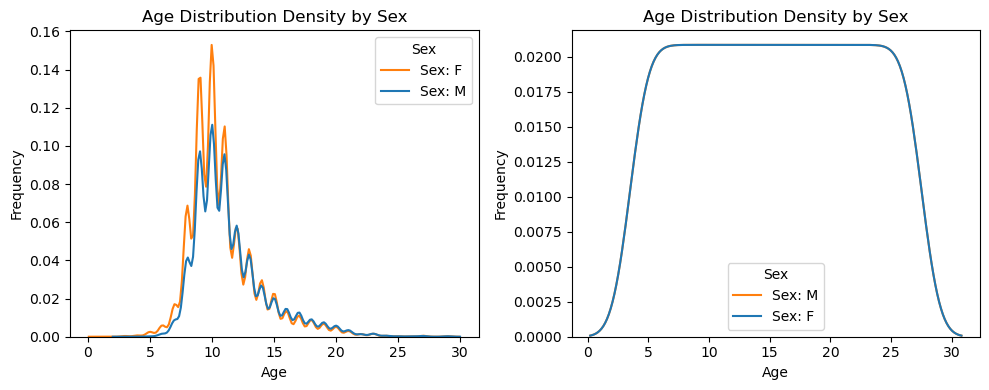

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Create subplots with 1 row and 2 columns
for i, d in enumerate([df_filtered, df_sample]):
    ax = axes[i]  # Get the corresponding axis for each subplot
    sns.kdeplot(data=d, x='Age', hue='Sex', ax=ax)
    ax.set_title('Age Distribution Density by Sex')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    sex_categories = d['Sex'].unique()
    legend_labels = [f'Sex: {sex}' for sex in sex_categories]
    ax.legend(legend_labels, title='Sex')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
## Test Male Female Significance in Each Age Group

In [152]:
print("Age > 18")
print("-------------------------")
for var in variables:
    group1 = df_age_gt_18[df_age_gt_18['Sex'] == 'M'][var]
    group2 = df_age_gt_18[df_age_gt_18['Sex'] == 'F'][var]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"Variable: {var}")
    print(f"For Males and Females: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("Reject null")
    print("-------------------------")

Age > 18
-------------------------
Variable: Length
For Males and Females: t-statistic=-4.702, p-value=0.000
Reject null
-------------------------
Variable: Diameter
For Males and Females: t-statistic=-4.479, p-value=0.000
Reject null
-------------------------
Variable: Height
For Males and Females: t-statistic=-4.612, p-value=0.000
Reject null
-------------------------
Variable: Weight
For Males and Females: t-statistic=-4.100, p-value=0.000
Reject null
-------------------------
Variable: Shucked Weight
For Males and Females: t-statistic=-2.344, p-value=0.019
Reject null
-------------------------
Variable: Viscera Weight
For Males and Females: t-statistic=-5.526, p-value=0.000
Reject null
-------------------------
Variable: Shell Weight
For Males and Females: t-statistic=-4.056, p-value=0.000
Reject null
-------------------------
Variable: Volume
For Males and Females: t-statistic=-4.800, p-value=0.000
Reject null
-------------------------
Variable: Density
For Males and Females: t-st

In [153]:
print("Age 5-11")
print("-------------------------")
for var in variables:
    group1 = df_age_5_11[df_age_5_11['Sex'] == 'M'][var]
    group2 = df_age_5_11[df_age_5_11['Sex'] == 'F'][var]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"Variable: {var}")
    print(f"For Males and Females: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("Reject null")
    print("-------------------------")

Age 5-11
-------------------------
Variable: Length
For Males and Females: t-statistic=-4.601, p-value=0.000
Reject null
-------------------------
Variable: Diameter
For Males and Females: t-statistic=-4.556, p-value=0.000
Reject null
-------------------------
Variable: Height
For Males and Females: t-statistic=-4.492, p-value=0.000
Reject null
-------------------------
Variable: Weight
For Males and Females: t-statistic=-3.614, p-value=0.000
Reject null
-------------------------
Variable: Shucked Weight
For Males and Females: t-statistic=-3.447, p-value=0.001
Reject null
-------------------------
Variable: Viscera Weight
For Males and Females: t-statistic=-4.102, p-value=0.000
Reject null
-------------------------
Variable: Shell Weight
For Males and Females: t-statistic=-3.733, p-value=0.000
Reject null
-------------------------
Variable: Volume
For Males and Females: t-statistic=-3.817, p-value=0.000
Reject null
-------------------------
Variable: Density
For Males and Females: t-st

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
Notes on t testing subsets

* I tested my two subsets expecting one to be significant an the other not to.  They are both significant.  I assume this is because of un-equal samples across ages.  this would nullify significance testing if age is not controlled for.

* Re-did the analysis with after normalizing the sample across ages and found that density and shucked weight are the most similar in old the old crab group.

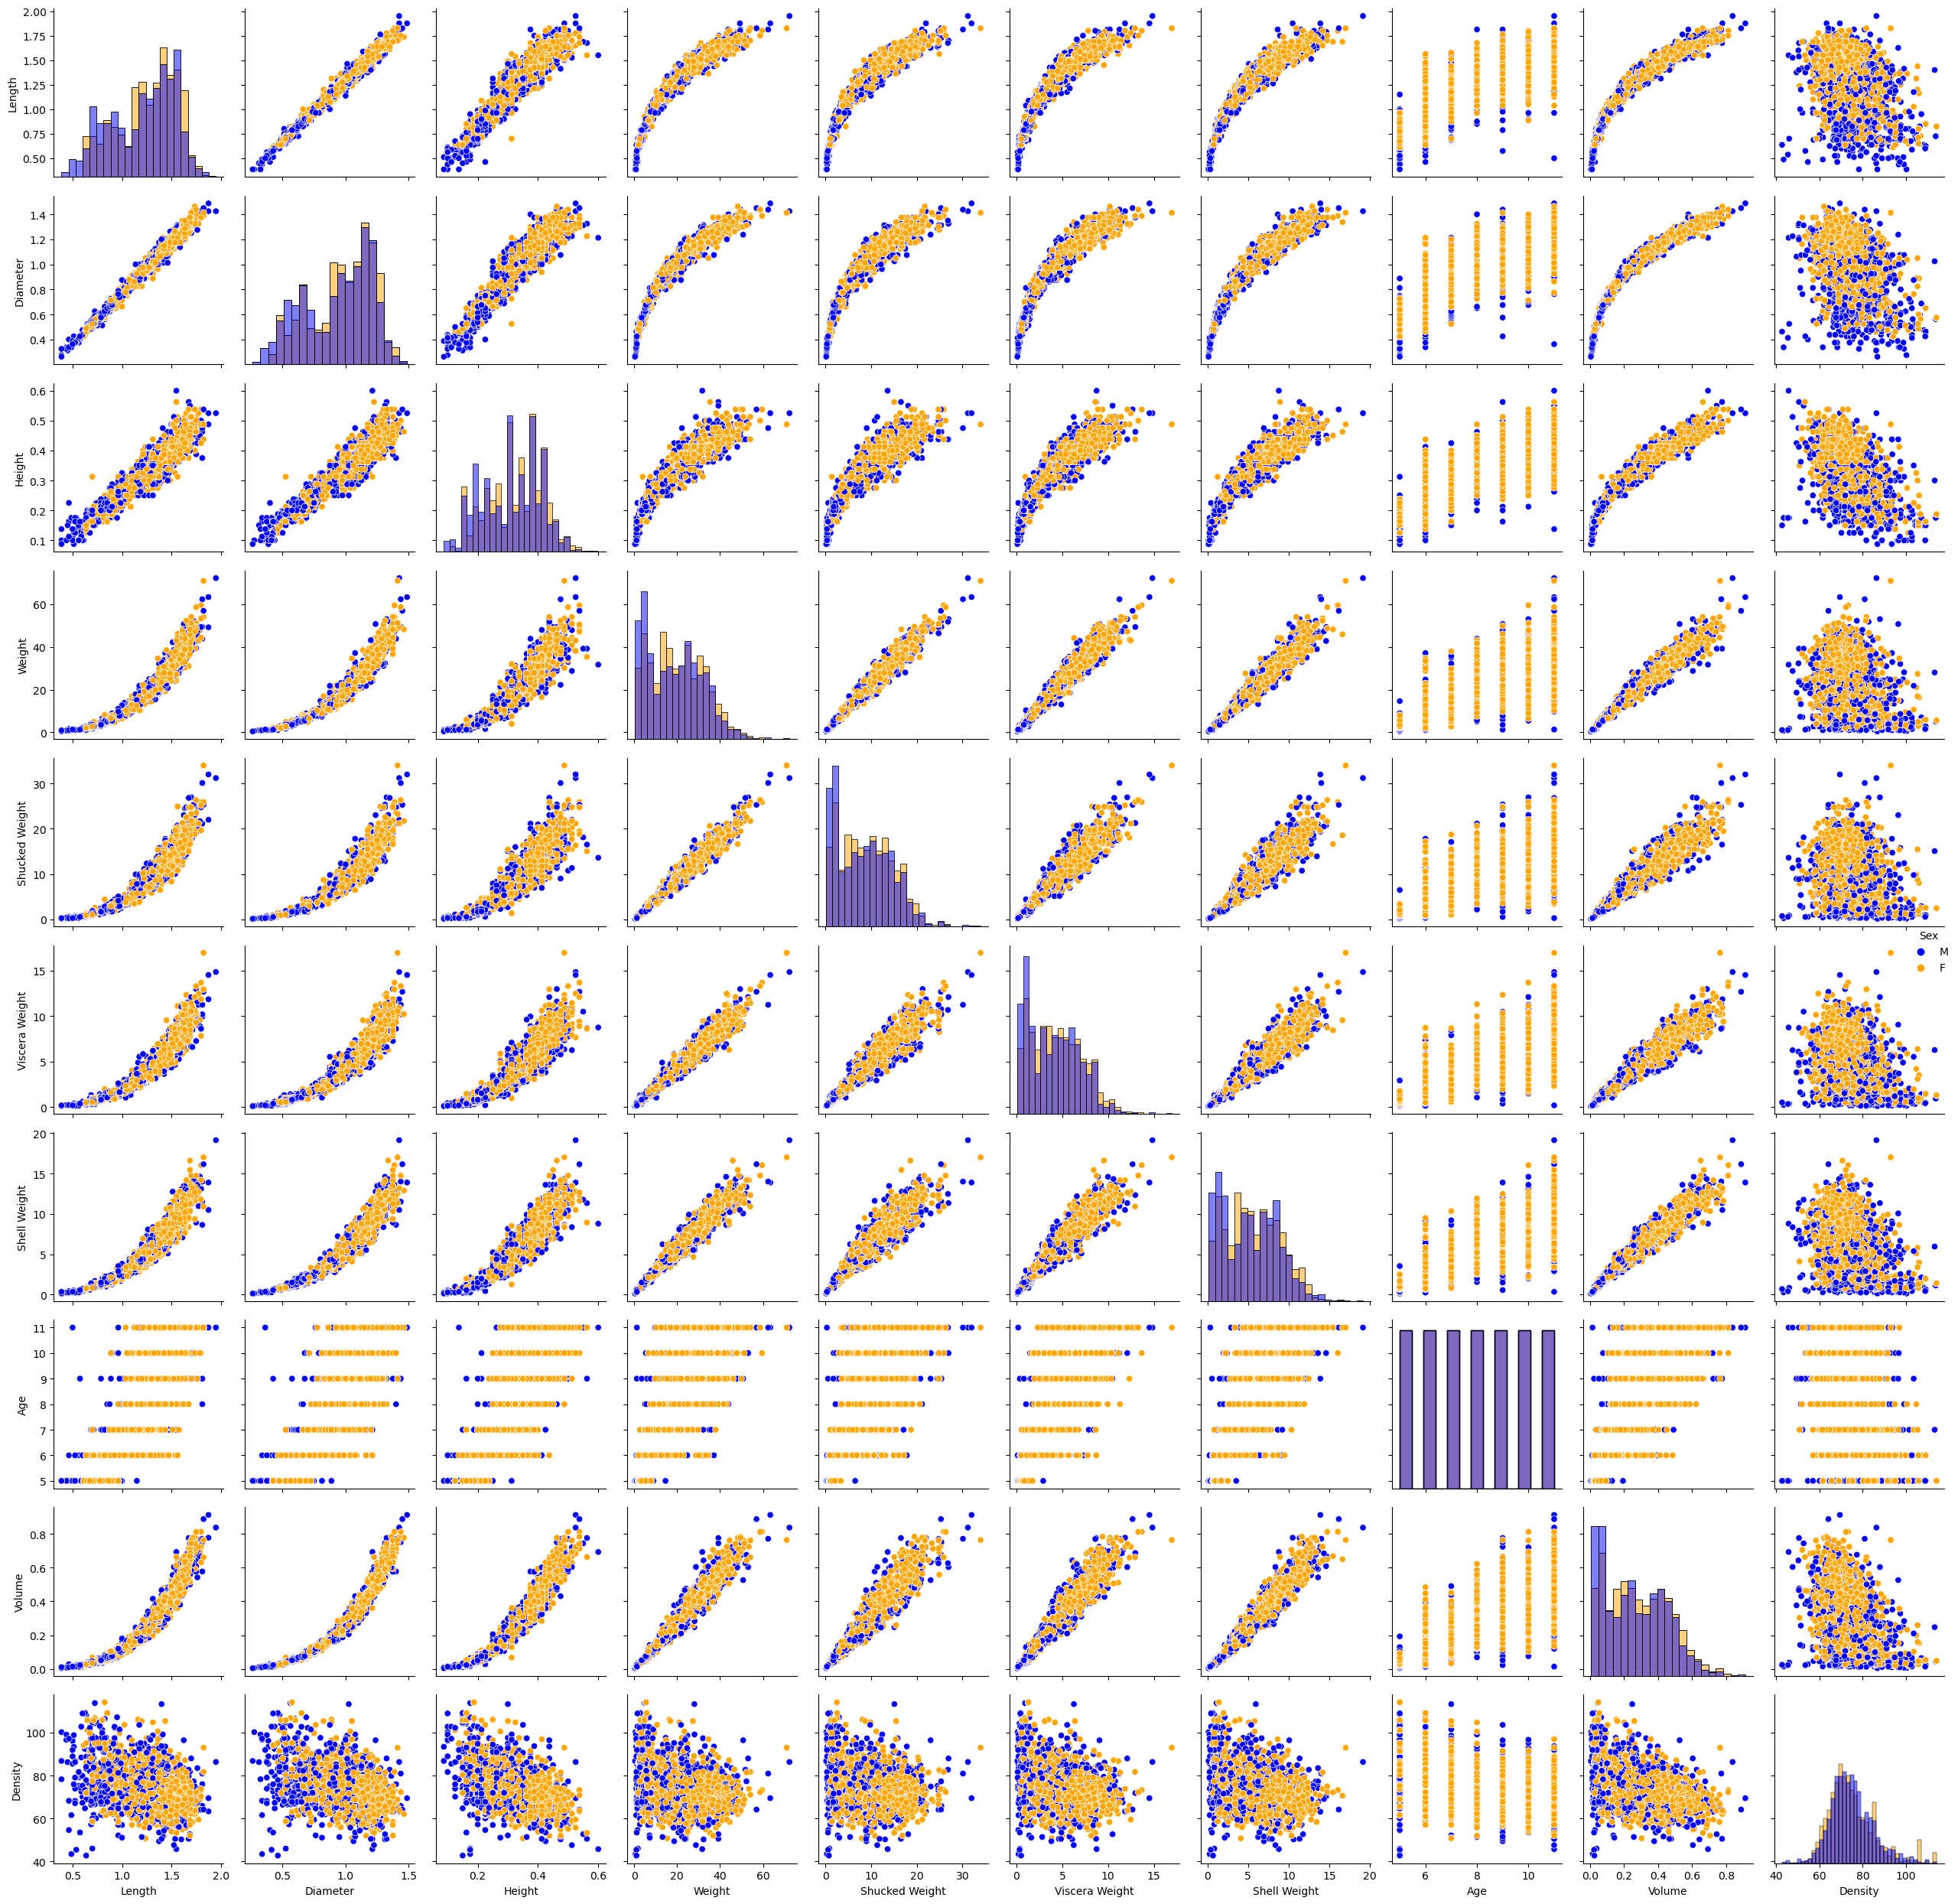

In [154]:
# Create PairGrid plot for dataset_5_11
g1 = sns.PairGrid(df_age_5_11, hue='Sex', palette=['blue', 'orange'], hue_order=['M', 'F'])
g1.map_upper(sns.scatterplot)
g1.map_lower(sns.scatterplot)
#g1.map_lower(sns.kdeplot)
g1.map_diag(sns.histplot)
g1.add_legend(title='Sex')
plt.tight_layout()
plt.show()

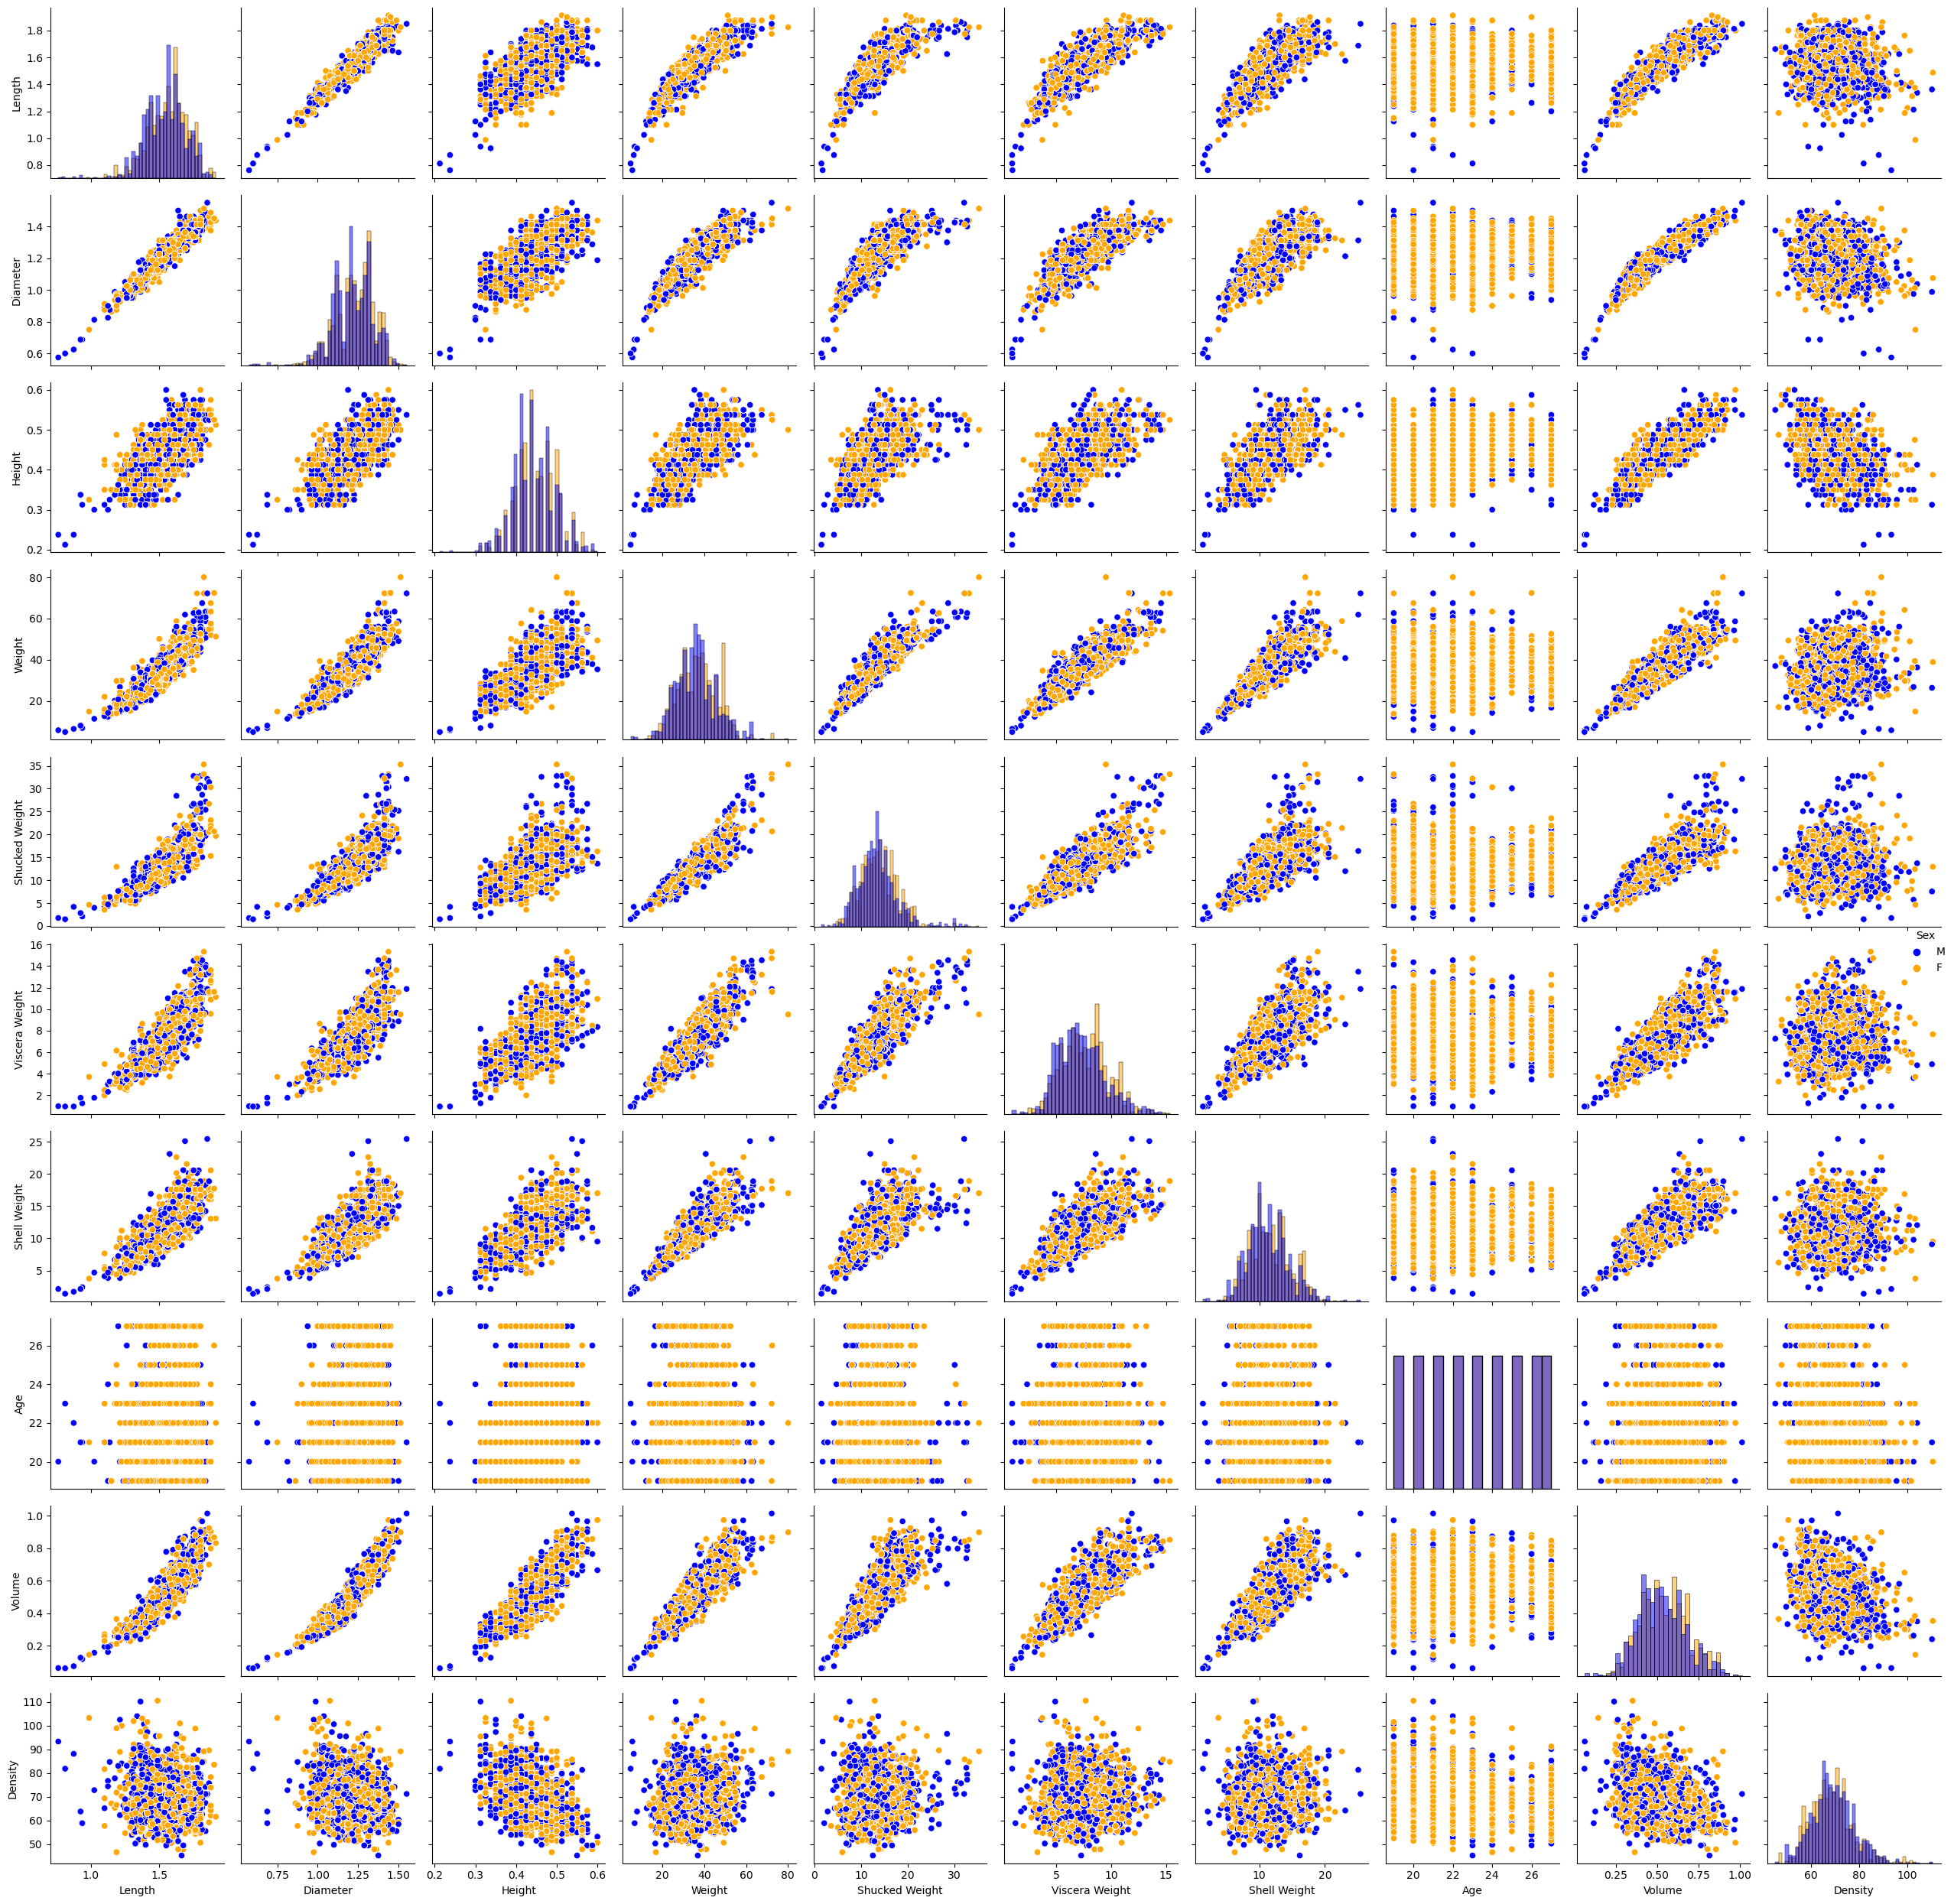

In [155]:
g2 = sns.PairGrid(df_age_gt_18, hue='Sex', palette=['blue', 'orange'], hue_order=['M', 'F'])
g2.map_upper(sns.scatterplot)
g2.map_lower(sns.scatterplot)
#g2.map_lower(sns.kdeplot)
g2.map_diag(sns.histplot)
g2.add_legend(title='Sex')
plt.tight_layout()
plt.show()

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">

### Notes on Pair Plot
* The differences between sexes is not apparent visually here in the scatter plot.
* There are some interesting asymtote, liniar and curved relationships.  There appear to be finite sizes the crabs can reach.

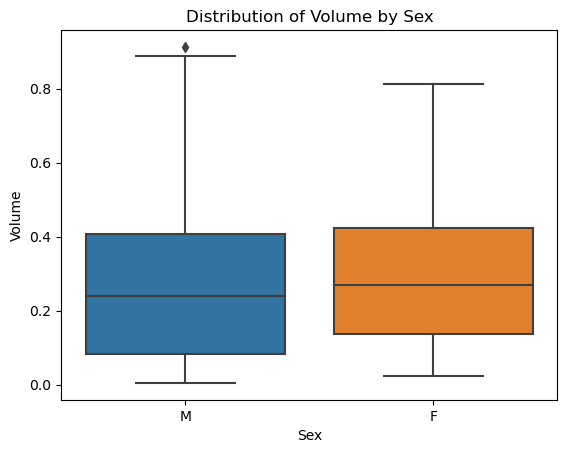

In [156]:
# Create a box plot to compare the distributions of Age for male and female crabs
sns.boxplot(x='Sex', y='Volume', data=df_age_5_11)

# Set plot labels
plt.xlabel('Sex')
plt.ylabel('Volume')

# Set plot title
plt.title('Distribution of Volume by Sex')

# Display the plot
plt.show()


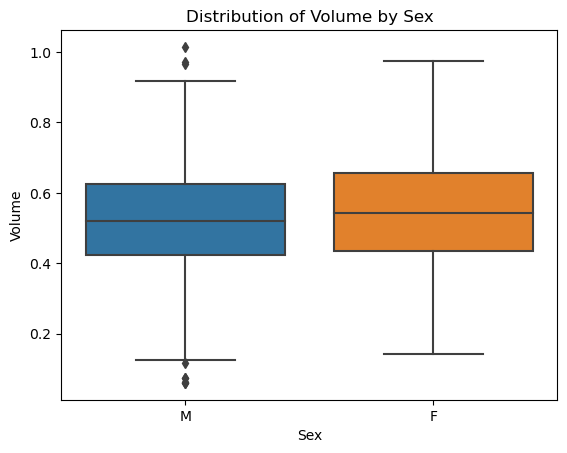

In [157]:
# Create a box plot to compare the distributions of Age for male and female crabs
sns.boxplot(x='Sex', y='Volume', data=df_age_gt_18)

# Set plot labels
plt.xlabel('Sex')
plt.ylabel('Volume')

# Set plot title
plt.title('Distribution of Volume by Sex')

# Display the plot
plt.show()

# notes on additional plots

Hard to spot differences in the sexes.  Will need to explore by age in order to really dig into it.

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Model Crab Size Over Time
* Line of Age x Average Dimension and Confidence Interval.
* Regression of Age x Weight in each of the three age buckets
* Smoothed Regression line
* Analysis of Variance Between 3 Age Buckets

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Line of Age x Average Dimension and Confidence Interval.

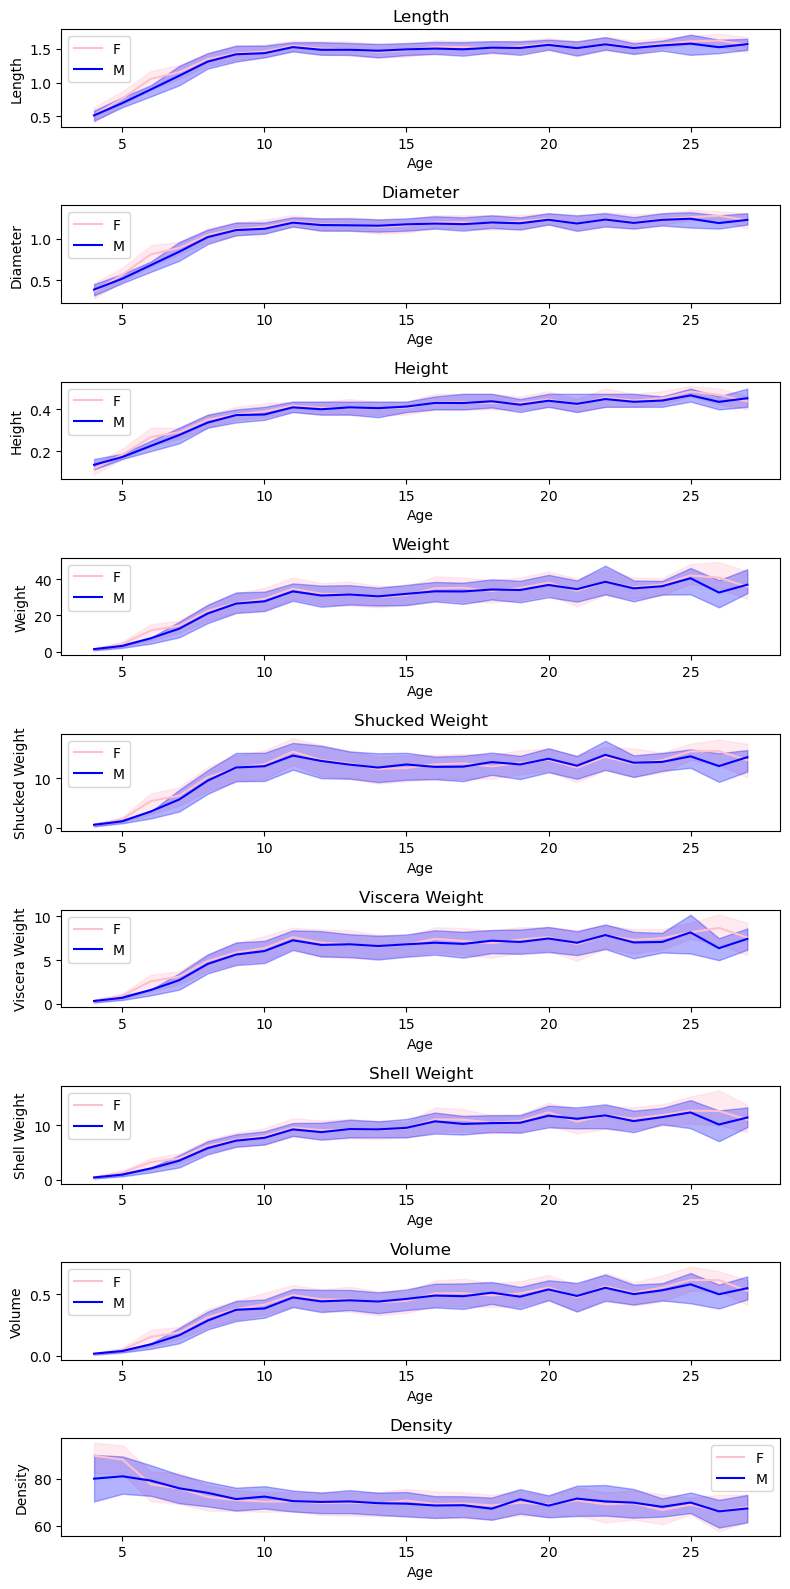

In [158]:
grouped_data = df_sample.groupby('Sex')
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 16))
plt.subplots_adjust(hspace=0.7)
for i, variable in enumerate(variables): # Variable Iteration Loop
    colors = ['pink', 'blue'] # Initialize colors for males and females
    for j, (sex, group) in enumerate(grouped_data):  # One line per sex
        # Calculate the mean and confidence interval
        mean = group.groupby('Age')[variable].mean()
        lower_ci = group.groupby('Age')[variable].quantile(0.25)
        upper_ci = group.groupby('Age')[variable].quantile(0.75)
        axes[i].plot(mean.index, mean, label=sex, color=colors[j]) # mean
        axes[i].fill_between(mean.index, lower_ci, upper_ci, alpha=0.3, color=colors[j]) # Confidence interval   
    axes[i].set_title(variable)  # Set the title and labels for each variable subplot
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(variable)
    axes[i].legend()  # legend
plt.tight_layout() # Adjust the figure layout and spacing
plt.show() # Display the plot

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Regression of Age x Weight 5 - 11 years

In [178]:
males = df_age_5_11[df_age_5_11['Sex'] == 'M'].copy()
females = df_age_5_11[df_age_5_11['Sex'] == 'F'].copy()

males['Age_jittered'] = males['Age'] + np.random.uniform(-0.4, 0.4, len(males))
females['Age_jittered'] = females['Age'] + np.random.uniform(-0.4, 0.4, len(females))

In [179]:
X_males = males[['Age']]
y_males = males['Weight']
X_males = sm.add_constant(X_males)
model_males = sm.OLS(y_males, X_males).fit()  
X_females = females[['Age']]
y_females = females['Weight']
X_females = sm.add_constant(X_females) 
model_females = sm.OLS(y_females, X_females).fit()

In [180]:
# Model summaries
print("Male Regression Summary:")
print(model_males.summary())
print("\nFemale Regression Summary:")
print(model_females.summary())

Male Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3021.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:05:40   Log-Likelihood:                -4933.7
No. Observations:                1456   AIC:                             9871.
Df Residuals:                    1454   BIC:                             9882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.5299      

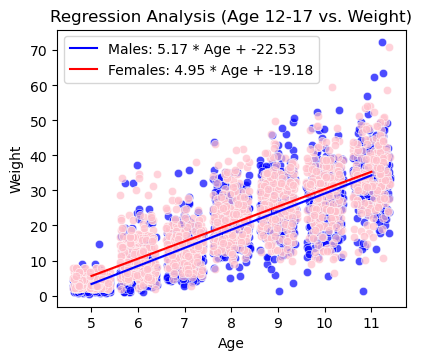

In [181]:
# Scatter plot
plt.figure(figsize=(4.5, 3.6))
sns.scatterplot(data=males, x='Age_jittered', y='Weight', color='blue', alpha=0.7)
sns.scatterplot(data=females, x='Age_jittered', y='Weight', color='pink', alpha=0.7)
sns.lineplot(x=males['Age'], y=model_males.predict(X_males), color='blue', label=f'Males: {model_males.params[1]:.2f} * Age + {model_males.params[0]:.2f}')
sns.lineplot(x=females['Age'], y=model_females.predict(X_females), color='red', label=f'Females: {model_females.params[1]:.2f} * Age + {model_females.params[0]:.2f}')
plt.title('Regression Analysis (Age 12-17 vs. Weight)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Regression of Age x Weight 12 - 18 years

In [182]:
df_age_12_18 = df_sample[(df_sample['Age'] >= 12) & (df_sample['Age'] <= 18)]

males = df_age_12_18[df_age_12_18['Sex'] == 'M'].copy()
females = df_age_12_18[df_age_12_18['Sex'] == 'F'].copy()

males['Age_jittered'] = males['Age'] + np.random.uniform(-0.4, 0.4, len(males))
females['Age_jittered'] = females['Age'] + np.random.uniform(-0.4, 0.4, len(females))

In [183]:
X_males = males[['Age']]
y_males = males['Weight']
X_males = sm.add_constant(X_males)
model_males = sm.OLS(y_males, X_males).fit()  
X_females = females[['Age']]
y_females = females['Weight']
X_females = sm.add_constant(X_females) 
model_females = sm.OLS(y_females, X_females).fit()

In [184]:
# Model summaries
print("Male Regression Summary:")
print(model_males.summary())

print("\nFemale Regression Summary:")
print(model_females.summary())

Male Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     21.26
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           4.36e-06
Time:                        17:05:51   Log-Likelihood:                -5336.6
No. Observations:                1456   AIC:                         1.068e+04
Df Residuals:                    1454   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6153      

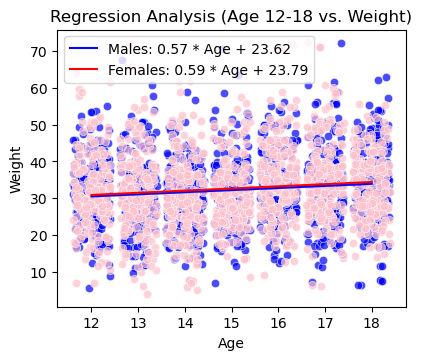

In [185]:
# Scatter plot
plt.figure(figsize=(4.5, 3.6))
sns.scatterplot(data=males, x='Age_jittered', y='Weight', color='blue', alpha=0.7)
sns.scatterplot(data=females, x='Age_jittered', y='Weight', color='pink', alpha=0.7) 
sns.lineplot(x=males['Age'], y=model_males.predict(X_males), color='blue', label=f'Males: {model_males.params[1]:.2f} * Age + {model_males.params[0]:.2f}')
sns.lineplot(x=females['Age'], y=model_females.predict(X_females), color='red', label=f'Females: {model_females.params[1]:.2f} * Age + {model_females.params[0]:.2f}')
plt.title('Regression Analysis (Age 12-18 vs. Weight)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Regression of Age x Weight 18+ years

In [196]:
df_age_gt_18 = df_age_gt_18[(df_age_gt_18['Age'] != 25)]

males = df_age_gt_18[df_age_gt_18['Sex'] == 'M'].copy()
females = df_age_gt_18[df_age_gt_18['Sex'] == 'F'].copy()

males['Age_jittered'] = males['Age'] + np.random.uniform(-0.4, 0.4, len(males))
females['Age_jittered'] = females['Age'] + np.random.uniform(-0.4, 0.4, len(females))



In [197]:
# Regression analysis for males
X_males = males[['Age']]
y_males = males['Weight']
X_males = sm.add_constant(X_males)
model_males = sm.OLS(y_males, X_males).fit()  
X_females = females[['Age']]
y_females = females['Weight']
X_females = sm.add_constant(X_females) 
model_females = sm.OLS(y_females, X_females).fit()

In [198]:
print("Male Regression Summary:")
print(model_males.summary())
print("\nFemale Regression Summary:")
print(model_females.summary())

Male Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04924
Date:                Wed, 28 Jun 2023   Prob (F-statistic):              0.824
Time:                        17:09:44   Log-Likelihood:                -6082.9
No. Observations:                1664   AIC:                         1.217e+04
Df Residuals:                    1662   BIC:                         1.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9300      

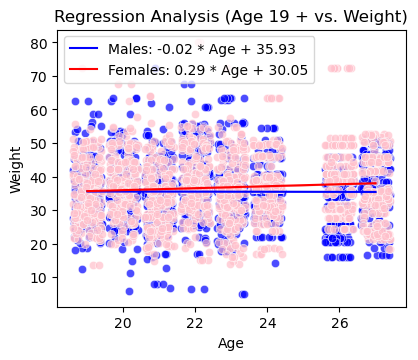

In [199]:
# Scatter plot
plt.figure(figsize=(4.5, 3.6))
sns.scatterplot(data=males, x='Age_jittered', y='Weight', color='blue', alpha=0.7)
sns.scatterplot(data=females, x='Age_jittered', y='Weight', color='pink', alpha=0.7)

# Regression lines and formulas for males and females
sns.lineplot(x=males['Age'], y=model_males.predict(X_males), color='blue', label=f'Males: {model_males.params[1]:.2f} * Age + {model_males.params[0]:.2f}')
sns.lineplot(x=females['Age'], y=model_females.predict(X_females), color='red', label=f'Females: {model_females.params[1]:.2f} * Age + {model_females.params[0]:.2f}')

plt.title('Regression Analysis (Age 19 + vs. Weight)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend() 
plt.show()

* Age 25 females are quite a bit above the males.  I will re-try the old regresstion and omit them.

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Smoothed Regression

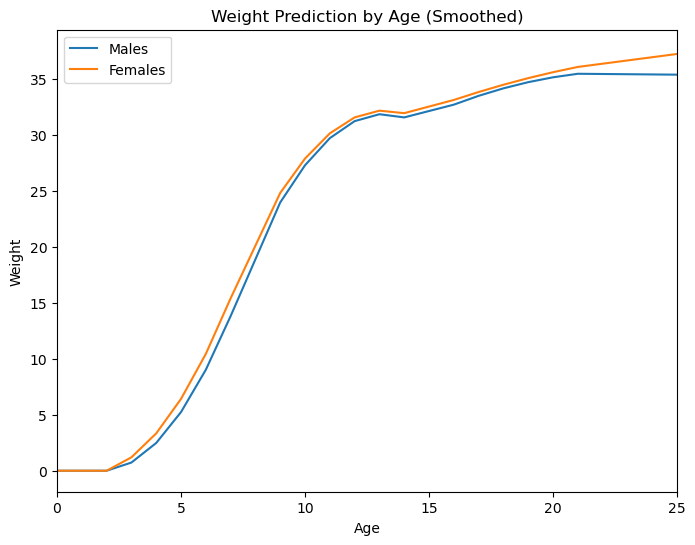

In [201]:

age_range = np.arange(0, 29)

# Weight calculation based on age range
weights_male = np.zeros_like(age_range, dtype=float)
weights_female = np.zeros_like(age_range, dtype=float)

for i, age in enumerate(age_range):
    if age < 5:
        weights_male[i] = 0
        weights_female[i] = 0
    elif age >= 5 and age <= 11:
        weights_male[i] = 5.08 * age - 21.74
        weights_female[i] = 4.71 * age - 17.56
    elif age >= 12 and age <= 18:
        weights_male[i] = 0.57 * age + 23.6
        weights_female[i] = 0.59 * age + 23.7
    else:
        weights_male[i] = -0.02 * age + 35.9
        weights_female[i] = 0.29 * age + 30

# Moving average for smoothing
window_size = 5 
weights_male_smoothed = np.convolve(weights_male, np.ones(window_size)/window_size, mode='same')
weights_female_smoothed = np.convolve(weights_female, np.ones(window_size)/window_size, mode='same')

# Plot Graph
plt.figure(figsize=(8, 6))
plt.plot(age_range, weights_male_smoothed, label='Males')
plt.plot(age_range, weights_female_smoothed, label='Females')

plt.xlim(0, 25) 
plt.title('Weight Prediction by Age (Smoothed)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()



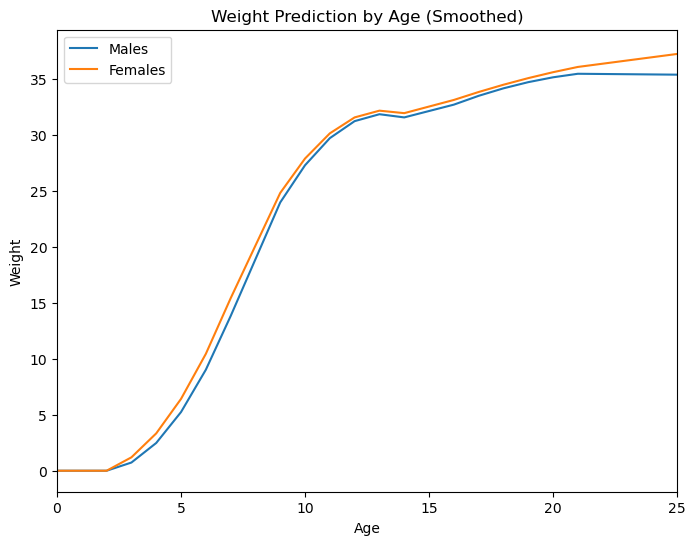

<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Analysis of Variance Between 3 Age Buckets

In [202]:
from scipy import stats

# Extract the 'Weight' data for each dataset
weight_gt_18 = df_age_gt_18['Weight']
weight_12_18 = df_age_12_18['Weight']
weight_5_11 = df_age_5_11['Weight']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(weight_gt_18, weight_12_18, weight_5_11)

# Print the results
print("ANOVA Results:")
print("F-value:", fvalue)
print("p-value:", pvalue)


ANOVA Results:
F-value: 2002.5639636706694
p-value: 0.0


In [203]:
# Combine the weight data from all three groups
weight_data = np.concatenate([weight_gt_18, weight_12_18, weight_5_11])

# orresponding group labels array
group_labels = ['18+', '12-18', '5-11']
group_labels = np.repeat(group_labels, [len(weight_gt_18), len(weight_12_18), len(weight_5_11)])

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(weight_data, group_labels)
print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 12-18    18+   3.7194   0.0   3.0861   4.3527   True
 12-18   5-11 -12.7755   0.0 -13.4296 -12.1215   True
   18+   5-11 -16.4949   0.0 -17.1282 -15.8617   True
-----------------------------------------------------


<div style="border: 2px solid #333; background-color: #f5f5f5; padding: 10px;">
    
# Conclusion
* Life stages appear produce far more significant size differences than sex.
* We are able to approximate 4 separate life stages for these crabs
1. Baby crabs: 0-4 years.  Baby crabs appeared to be difficult to sample as is evident by few observations present.
2. Young crabs: 5-11 years.  A period of rapid growth
3. Mature crabs: 12-18 years. Growth rate slows down
4. Old crabs: 19+ years.  Crabs can only grow so big.